In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

load  data

In [59]:
data = pd.read_csv("./PYTHON PROJECT DATASET/africa_food_prices.csv")


performing exploratory analysis(EDA)

In [60]:
data.head()

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,NaN
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,NaN
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,NaN
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,NaN
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,NaN


In [61]:
data.shape

(956779, 19)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956779 entries, 0 to 956778
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          956779 non-null  int64  
 1   country_id          956779 non-null  float64
 2   country             956779 non-null  object 
 3   state_id            956779 non-null  int64  
 4   state               830101 non-null  object 
 5   market_id           956779 non-null  int64  
 6   market              956779 non-null  object 
 7   produce_id          956779 non-null  int64  
 8   produce             956779 non-null  object 
 9   currency_id         956779 non-null  float64
 10  currency            956779 non-null  object 
 11  pt_id               956779 non-null  int64  
 12  market_type         956779 non-null  object 
 13  um_unit_id          956779 non-null  int64  
 14  quantity            956779 non-null  object 
 15  month               956779 non-nul

In [63]:
data.columns

Index(['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource'],
      dtype='object')

In [64]:
data.isnull().sum()

Unnamed: 0                 0
country_id                 0
country                    0
state_id                   0
state                 126678
market_id                  0
market                     0
produce_id                 0
produce                    0
currency_id                0
currency                   0
pt_id                      0
market_type                0
um_unit_id                 0
quantity                   0
month                      0
year                       0
price                      0
mp_commoditysource    956779
dtype: int64

In [65]:
#replace NaN with not giving 
data.fillna({"mp_commoditysource": "No value", "state": "Not Given"}, inplace=True)
data.isnull().sum()

Unnamed: 0            0
country_id            0
country               0
state_id              0
state                 0
market_id             0
market                0
produce_id            0
produce               0
currency_id           0
currency              0
pt_id                 0
market_type           0
um_unit_id            0
quantity              0
month                 0
year                  0
price                 0
mp_commoditysource    0
dtype: int64

In [66]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
956774    False
956775    False
956776    False
956777    False
956778    False
Length: 956779, dtype: bool

summary statistics

In [67]:
data.describe()

,Unnamed: 0,country_id,state_id,market_id,produce_id,currency_id,pt_id,um_unit_id,month,year,price
count,9.567790e+05,956779.000000,956779.000000,956779.000000,956779.000000,956779.0,956779.000000,956779.000000,956779.000000,956779.000000,9.567790e+05
mean,1.076345e+06,1961.192782,22287.911831,1392.594222,186.141214,0.0,14.926716,14.017183,6.381471,2015.704015,4.128833e+03
std,5.159597e+05,10404.034921,98565.608270,1027.751212,165.401303,0.0,0.263570,24.437728,3.418025,4.603829,1.381840e+05
min,1.542700e+04,4.000000,0.000000,101.000000,50.000000,0.0,14.000000,5.000000,1.000000,1990.000000,0.000000e+00
25%,5.939185e+05,90.000000,1836.000000,528.000000,67.000000,0.0,15.000000,5.000000,3.000000,2013.000000,6.500000e+01
50%,1.113054e+06,155.000000,2209.000000,1078.000000,105.000000,0.0,15.000000,5.000000,6.000000,2017.000000,2.505714e+02
75%,1.513290e+06,205.000000,21971.000000,2281.000000,262.000000,0.0,15.000000,9.000000,9.000000,2020.000000,7.221005e+02
max,2.050637e+06,70001.000000,900003.000000,6081.000000,887.000000,0.0,17.000000,175.000000,12.000000,2021.000000,1.725000e+07


grouping data by countries

In [68]:
grp1 = data.copy()
grp1.head()

,Unnamed: 0,country_id,country,state_id,state,market_id,market,produce_id,produce,currency_id,currency,pt_id,market_type,um_unit_id,quantity,month,year,price,mp_commoditysource
0,15427,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,4,2015,90.0,No value
1,15428,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,5,2015,96.0,No value
2,15429,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,6,2015,96.0,No value
3,15430,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,7,2015,83.0,No value
4,15431,4.0,Algeria,344,Alger,1794,Algiers,52,Rice - Retail,0.0,DZD,15,Retail,5,KG,8,2015,80.0,No value


In [69]:
grp1.country.value_counts()

Rwanda                      137746
Mali                         73843
Burundi                      60921
Gambia                       56971
Niger                        54974
Nigeria                      50285
Zambia                       42793
Mozambique                   42278
Libya                        41207
Benin                        39530
Senegal                      33563
Ghana                        25414
Ethiopia                     24627
Malawi                       22682
Cameroon                     22476
Guinea-Bissau                19796
Chad                         18896
Somalia                      18444
South Sudan                  17746
Central African Republic     12720
Liberia                      12302
Guinea                       11810
Sierra Leone                 11645
Zimbabwe                     10957
Mauritania                   10871
Sudan                         9890
Lesotho                       9364
Madagascar                    9193
Kenya               

Total number of countries

In [70]:
x = grp1["country"].nunique()
print("There are", x, "number of countries")

There are 42 number of countries


In [71]:
food_prices = grp1[["country", "state", "produce", "year", "price"]]
food_prices

,country,state,produce,year,price
0,Algeria,Alger,Rice - Retail,2015,90.0000
1,Algeria,Alger,Rice - Retail,2015,96.0000
2,Algeria,Alger,Rice - Retail,2015,96.0000
3,Algeria,Alger,Rice - Retail,2015,83.0000
4,Algeria,Alger,Rice - Retail,2015,80.0000
...,...,...,...,...,...
956774,Zimbabwe,Midlands,Beans (sugar) - Retail,2021,233.3333
956775,Zimbabwe,Midlands,Toothpaste - Retail,2021,112.5000
956776,Zimbabwe,Midlands,Laundry soap - Retail,2021,114.0000
956777,Zimbabwe,Midlands,Handwash soap - Retail,2021,59.5000


In [99]:
# total produce in nigeria
nigeria = food_prices[food_prices["country"]=="Nigeria"]
nigeria.nunique()

country        1
state         14
produce       58
year          20
price      13311
dtype: int64

In [86]:
stuff = food_prices[(food_prices["country"] == "Nigeria") & (food_prices["produce"] == "Bread - Retail")]
stuff.sort_values("year", ascending=False)

,country,state,produce,year,price
653965,Nigeria,Zamfara,Bread - Retail,2021,526.3150
632348,Nigeria,Lagos,Bread - Retail,2021,300.0000
635711,Nigeria,Yobe,Bread - Retail,2021,139.0000
635712,Nigeria,Yobe,Bread - Retail,2021,160.0000
635713,Nigeria,Yobe,Bread - Retail,2021,176.5000
...,...,...,...,...,...
630599,Nigeria,Kebbi,Bread - Retail,2014,197.7725
630598,Nigeria,Kebbi,Bread - Retail,2014,195.5500
633834,Nigeria,Oyo,Bread - Retail,2014,150.0000
633835,Nigeria,Oyo,Bread - Retail,2014,250.0000


<AxesSubplot: xlabel='state', ylabel='price'>

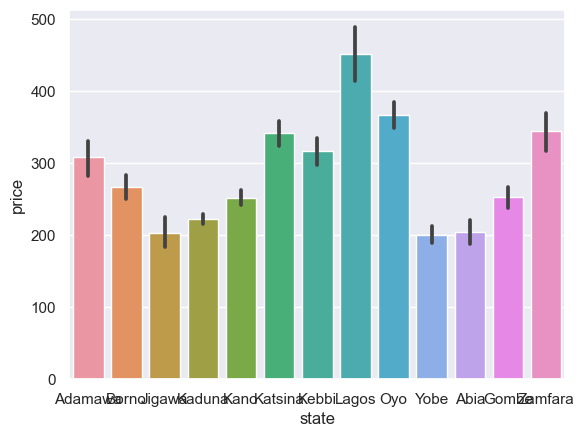

In [101]:
sns.barplot(data=stuff, x=stuff.state, y=stuff.price)
